In [1]:
import pandas as pd
import numpy as np

In [2]:
! ls 

alpha.ipynb
gbs_cohort_metadata_2024-06-20.txt
gbs_cohort_taxonomy_raw_counts_2024-06-20.txt


In [3]:
meta = pd.read_csv("gbs_cohort_metadata_2024-06-20.txt", sep="\t", index_col=1)
meta

,magic_id,time_cat,del_method,matabx_expo_cat,dist_tp,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_timeline.prior..during..after.,...,parity_n,laboronset_type,multip_yn,rom_hr,sepsisrisk,gbs_result,motherrace,motherethnicity,maternalheight,weight_prepregnancy_2
sample_id,,,,,,,,,,,,,,,,,,,,,
magic.0022,101,1,Vaginal,No antibiotics,NaN,NaN,NaN,3,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.1142,101,12,Vaginal,No antibiotics,0.11,2017-12-11,1330,48,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0519,101,6,Vaginal,No antibiotics,0.09,2017-06-11,NaN,24,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0051,102,1,Vaginal,No antibiotics,0.01,2017-01-11,2130,4,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
magic.1120,102,12,Vaginal,No antibiotics,0.01,2017-12-12,NaN,48,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5263,599,0,Vaginal,No antibiotics,0.26,2019-09-18,2000,1,regular,NaN,...,1,Induced,No,28.17,0.28,Negative,Asian,Unknown / Not Reported,161.3,125.0
magic.5187,601,0,C-section,Other antibiotics,0.23,2019-09-20,2210,1,regular,NaN,...,1,None,No,0.00,0.03,Negative,White,Non-Hispanic,162.6,145.0
magic.5176,603,0,Vaginal,No antibiotics,0.26,2019-09-25,1025,1,regular,NaN,...,2,Spontaneous,No,4.72,0.14,Negative,White,Non-Hispanic,162.6,135.0


In [4]:
meta.columns

Index(['magic_id', 'time_cat', 'del_method', 'matabx_expo_cat', 'dist_tp',
       'Date_Collected', 'Time_Collected', 'Timeline_Weeks', 'Abx_regular',
       'Abx_timeline.prior..during..after.', 'abx_day', 'Consistency', 'Color',
       'Amount', 'dob', 'babysex', 'gestational_age_wk',
       'gestational_age_days', 'weight1', 'sizeforgestationalage', 'icn',
       'icnabx', 'mat_ageatadm', 'gravidity_n', 'parity_n', 'laboronset_type',
       'multip_yn', 'rom_hr', 'sepsisrisk', 'gbs_result', 'motherrace',
       'motherethnicity', 'maternalheight', 'weight_prepregnancy_2'],
      dtype='object')

In [5]:
species = pd.read_csv("gbs_cohort_taxonomy_raw_counts_2024-06-20.txt", sep="\t", index_col=0)
species = species.div(species.sum(axis=1), axis=0)
species.sum(axis=1)

magic.0022    1.0
magic.1142    1.0
magic.0519    1.0
magic.0051    1.0
magic.1120    1.0
             ... 
magic.5263    1.0
magic.5187    1.0
magic.5176    1.0
magic.5175    1.0
magic.5088    1.0
Length: 1381, dtype: float64

In [6]:
info_df = pd.DataFrame(index=species.index)
info_df["richness"] = (species > 0.00001).sum(axis=1)
info_df["shannon"] = -(species * np.log(species)).sum(axis=1)
info_df["inv_simpson"] = 1 / (species ** 2).sum(axis=1)
# info_df["chao1"]
info_df

/Users/daniel/opt/anaconda3/envs/gmwi2_analysis/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,richness,shannon,inv_simpson
magic.0022,281,2.153768,5.215330
magic.1142,634,3.073860,6.755482
magic.0519,332,1.674136,2.140164
magic.0051,365,2.462290,5.254714
magic.1120,713,3.623643,12.394039
...,...,...,...
magic.5263,383,2.805359,7.380366
magic.5187,269,1.221619,1.639893
magic.5176,244,2.131968,5.745371
magic.5175,289,1.936507,2.912321


In [7]:
info_df["time"] = meta["time_cat"]
info_df["gbs"] = meta["matabx_expo_cat"]
info_df = info_df[info_df["gbs"] != "Other antibiotics"]
info_df["gbs"] = info_df["gbs"] == "GBS antibiotics"
info_df

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_51033/3400671990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df["gbs"] = info_df["gbs"] == "GBS antibiotics"


,richness,shannon,inv_simpson,time,gbs
magic.0022,281,2.153768,5.215330,1,False
magic.1142,634,3.073860,6.755482,12,False
magic.0519,332,1.674136,2.140164,6,False
magic.0051,365,2.462290,5.254714,1,False
magic.1120,713,3.623643,12.394039,12,False
...,...,...,...,...,...
magic.5245,468,2.223470,3.713183,0,False
magic.5194,249,1.166923,1.810684,0,False
magic.5263,383,2.805359,7.380366,0,False
magic.5176,244,2.131968,5.745371,0,False


In [11]:
from scipy.stats import ranksums
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

def analyze_timepoint(timepoint):
    info_df_curr = info_df[info_df["time"] == timepoint]
    gbs = info_df_curr[info_df_curr["gbs"]]
    no_gbs = info_df_curr[~info_df_curr["gbs"]]
    
    num_indicies = 3

    figs, axs = plt.subplots(1, num_indicies, figsize=(20, 5), dpi=200)

    for i, d in enumerate(info_df.columns[:num_indicies]):
        p = ranksums(gbs[d], no_gbs[d]).pvalue
        print(d, p)

        ax = axs[i]
        ax.boxplot(gbs[d], positions=[0])
        ax.boxplot(no_gbs[d], positions=[1])
        ax.scatter(np.random.normal(0, 0.01, len(gbs[d])), gbs[d], c="orange", s=1)
        ax.scatter(np.random.normal(1, 0.01, len(no_gbs[d])), no_gbs[d], c="orange", s=1)
        
        ylim = ax.get_ylim()
        max_ = ylim[1]
        range_ = ylim[1] - ylim[0]
        
        ax.set_ylim((ylim[0], ylim[1] + range_ * 0.1))
        ax.set_ylabel(d)
        ax.set_xticks([0, 1], [f"GBS \n(n = {len(gbs[d])})", f"No abx \n(n = {len(no_gbs[d])})"])
        
        text = '$P = %s$' % float('%.2g' % p) if p < 0.05 else "n.s."
        ax.text(0.5, max_, text, horizontalalignment="center")

    plt.show()

0
richness 0.4377584418358834
shannon 0.5167101219712151
inv_simpson 0.3863046771412292


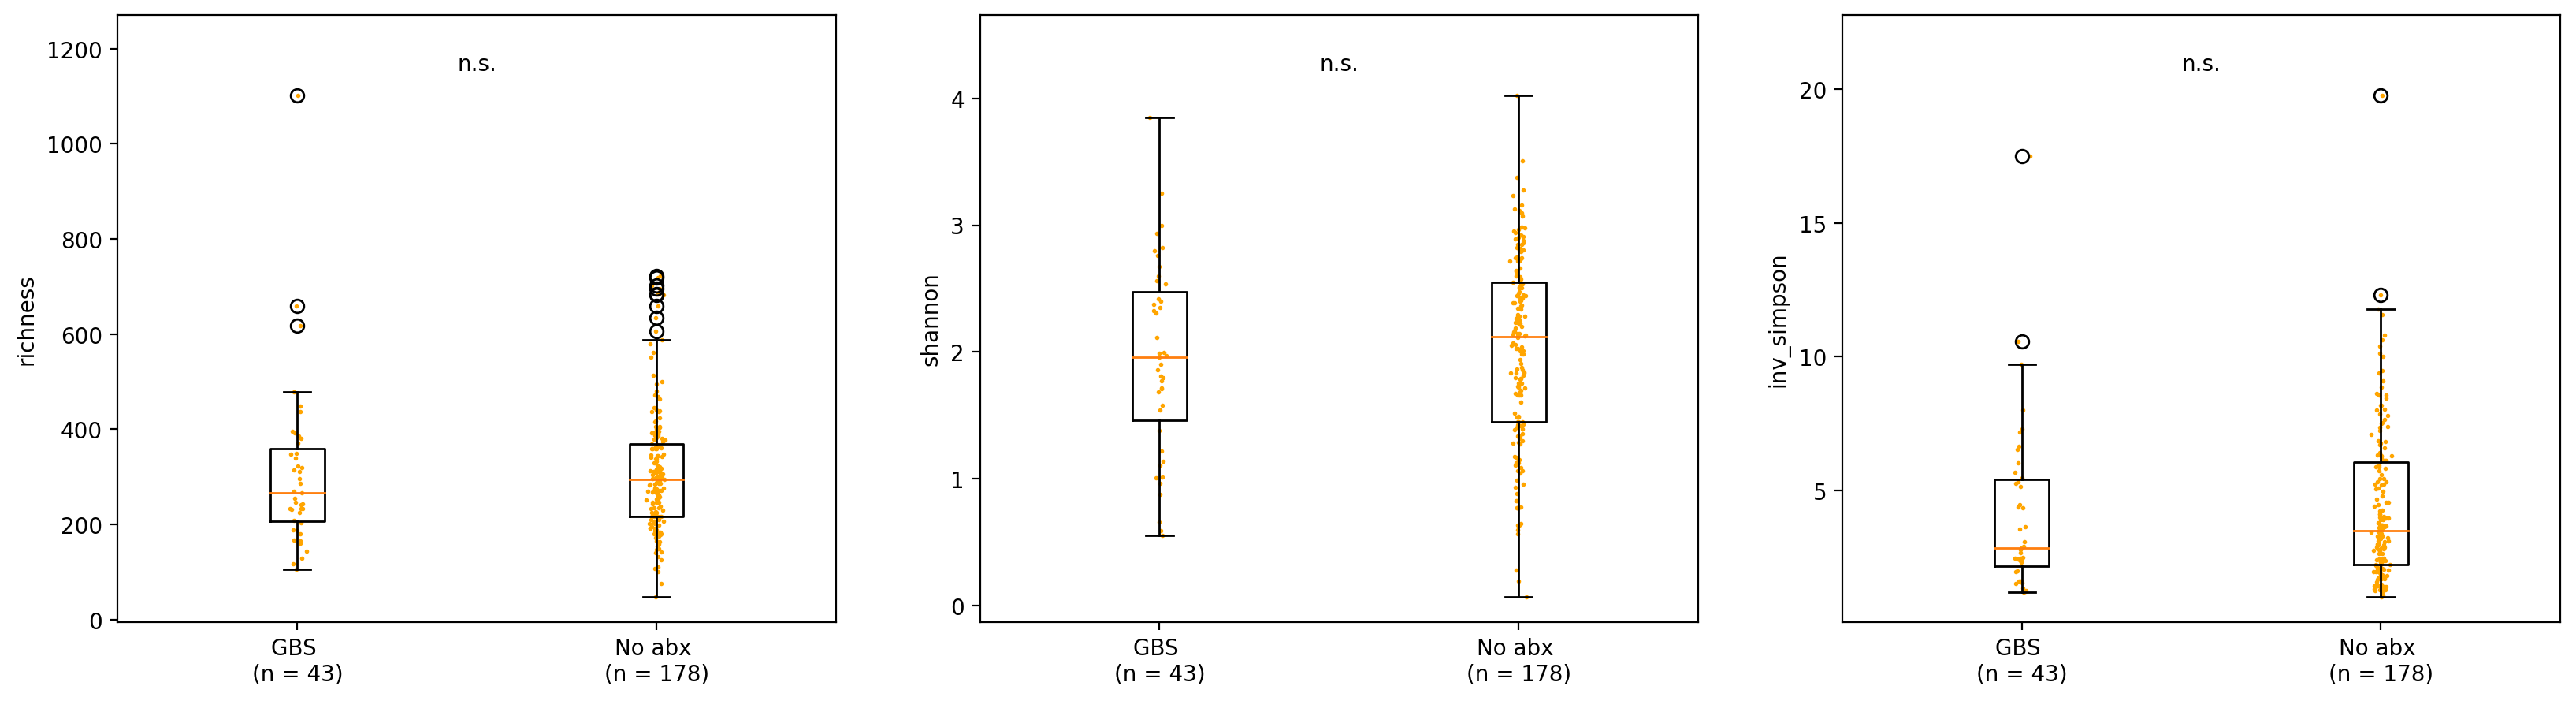

1
richness 0.5907925304930961
shannon 0.08772499754990104
inv_simpson 0.043892219974650815


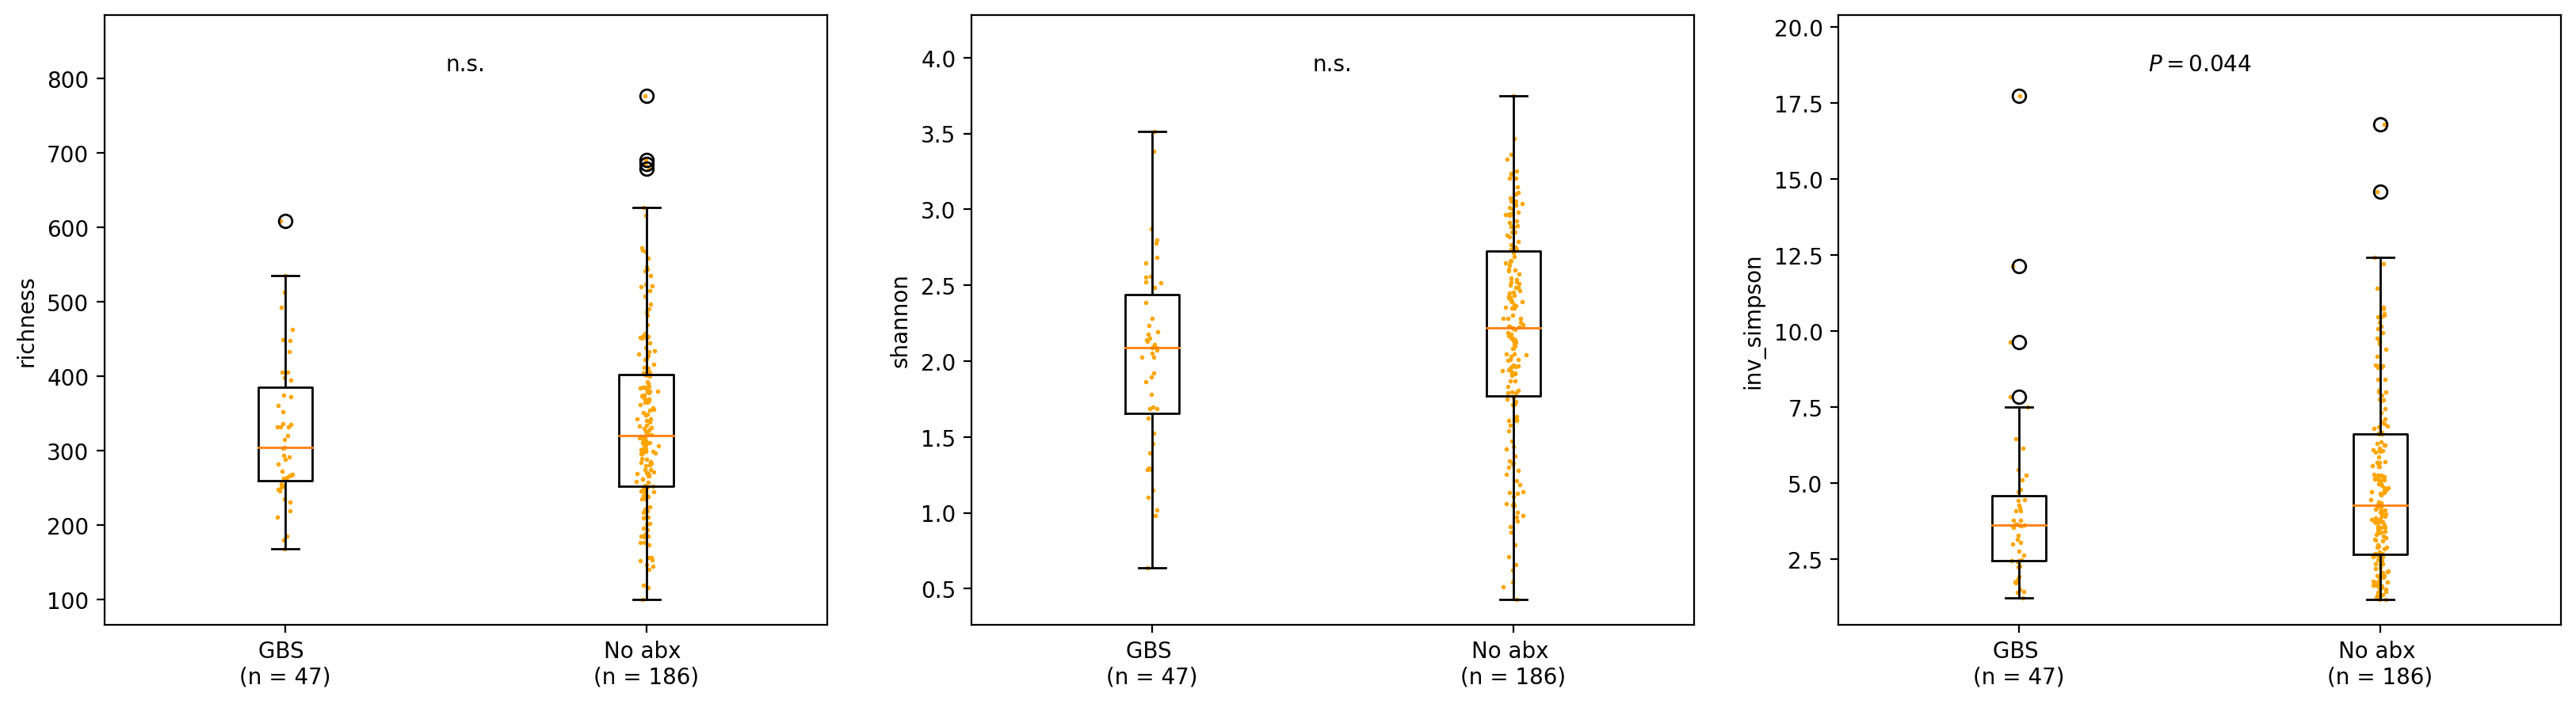

6
richness 0.4839988466103461
shannon 0.8564207077183011
inv_simpson 0.9720283877137216


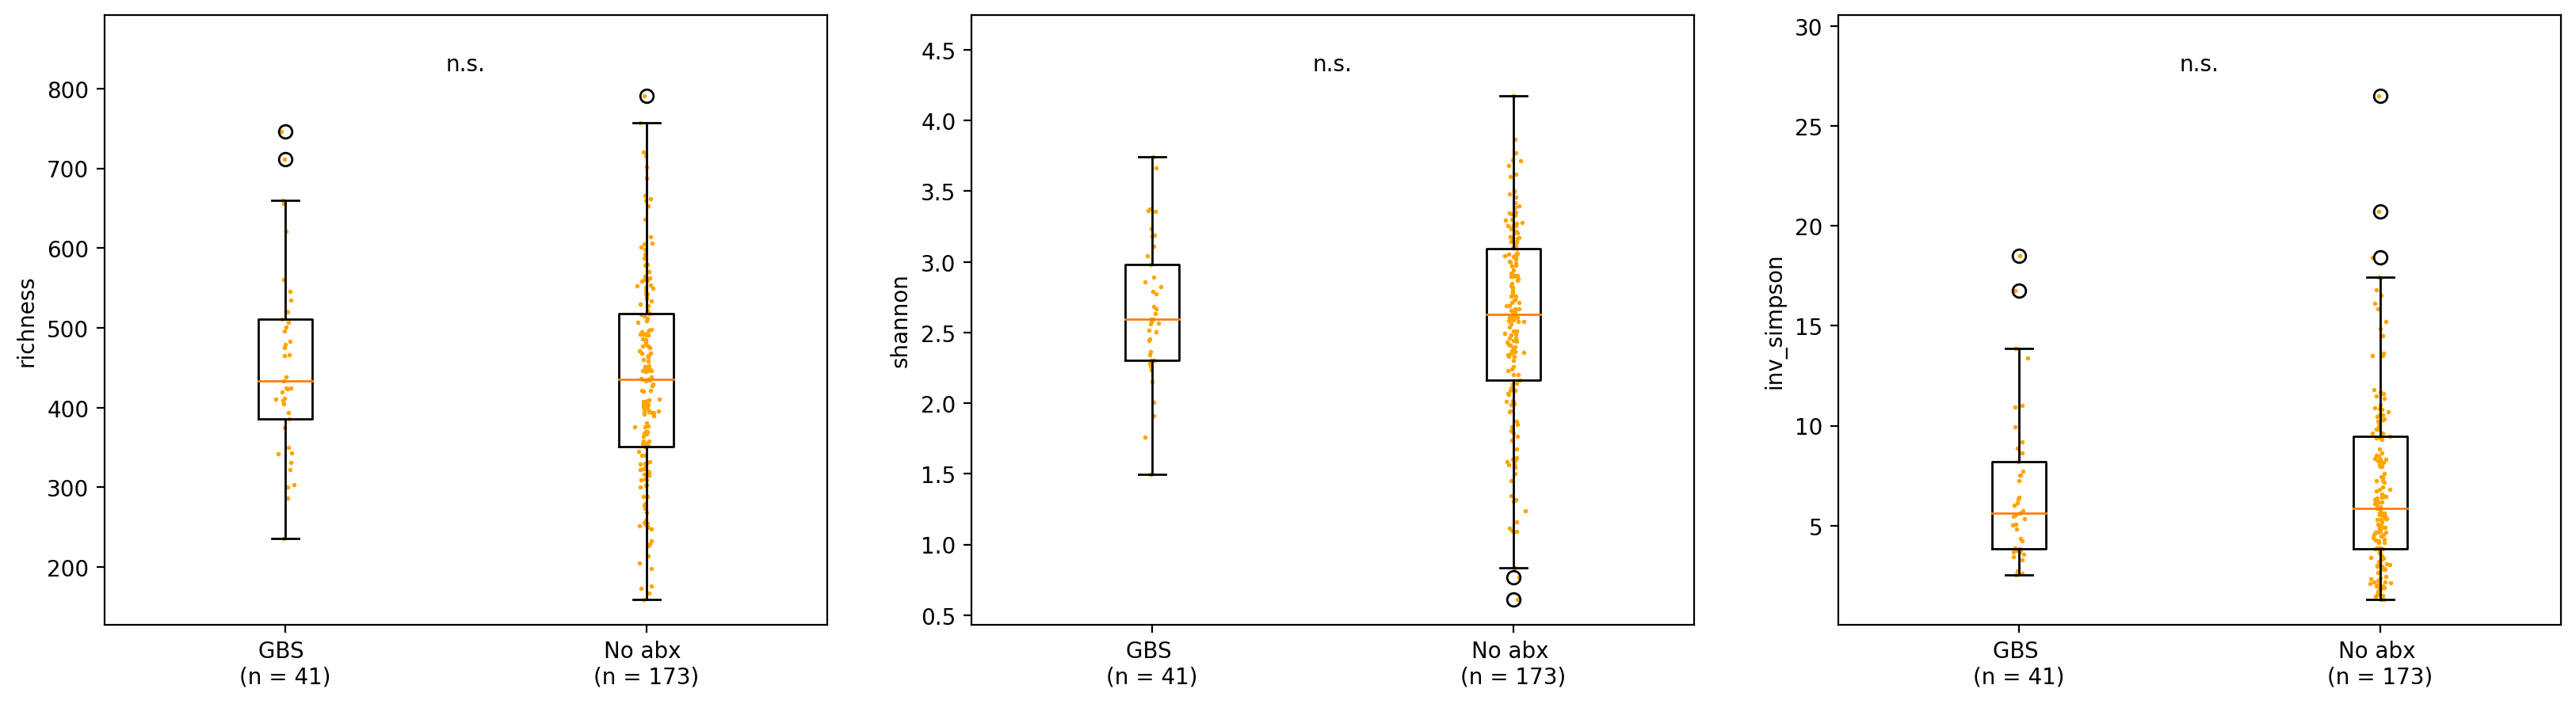

12
richness 0.149829313778766
shannon 0.741087712231755
inv_simpson 0.7461362025954319


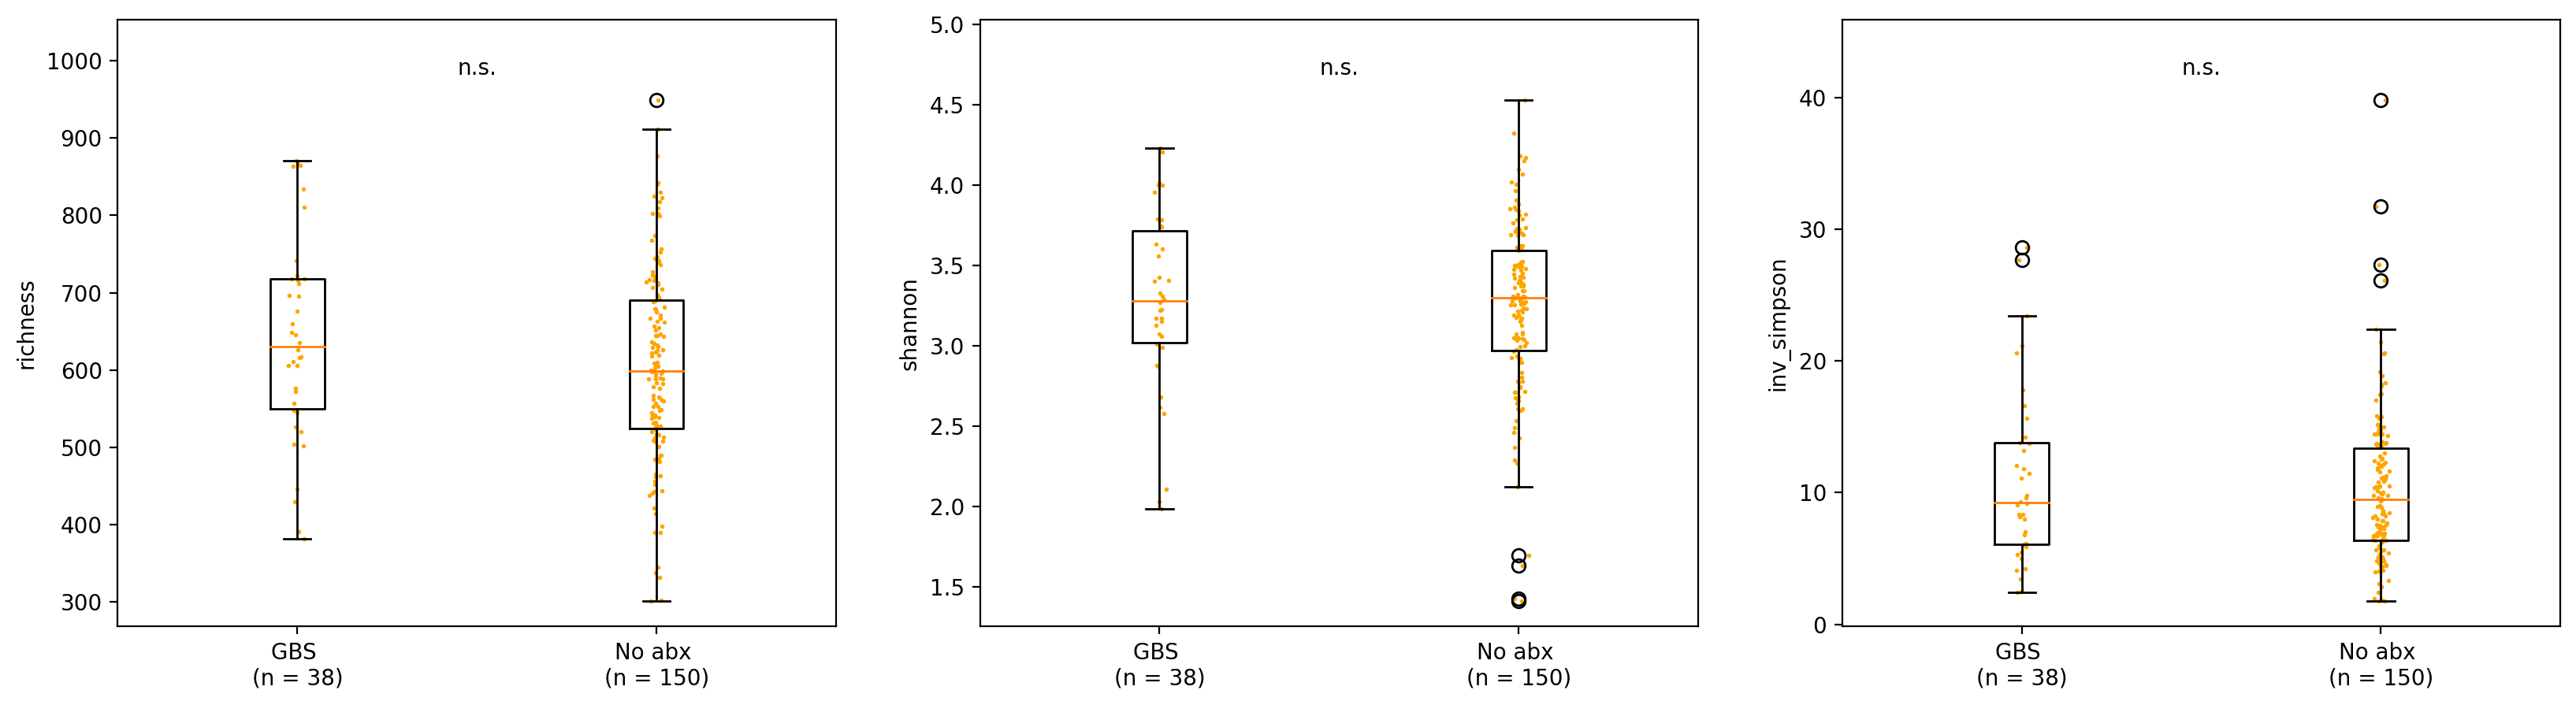

18
richness 0.8365440793273496
shannon 0.9653548196055952
inv_simpson 0.5007935410595481


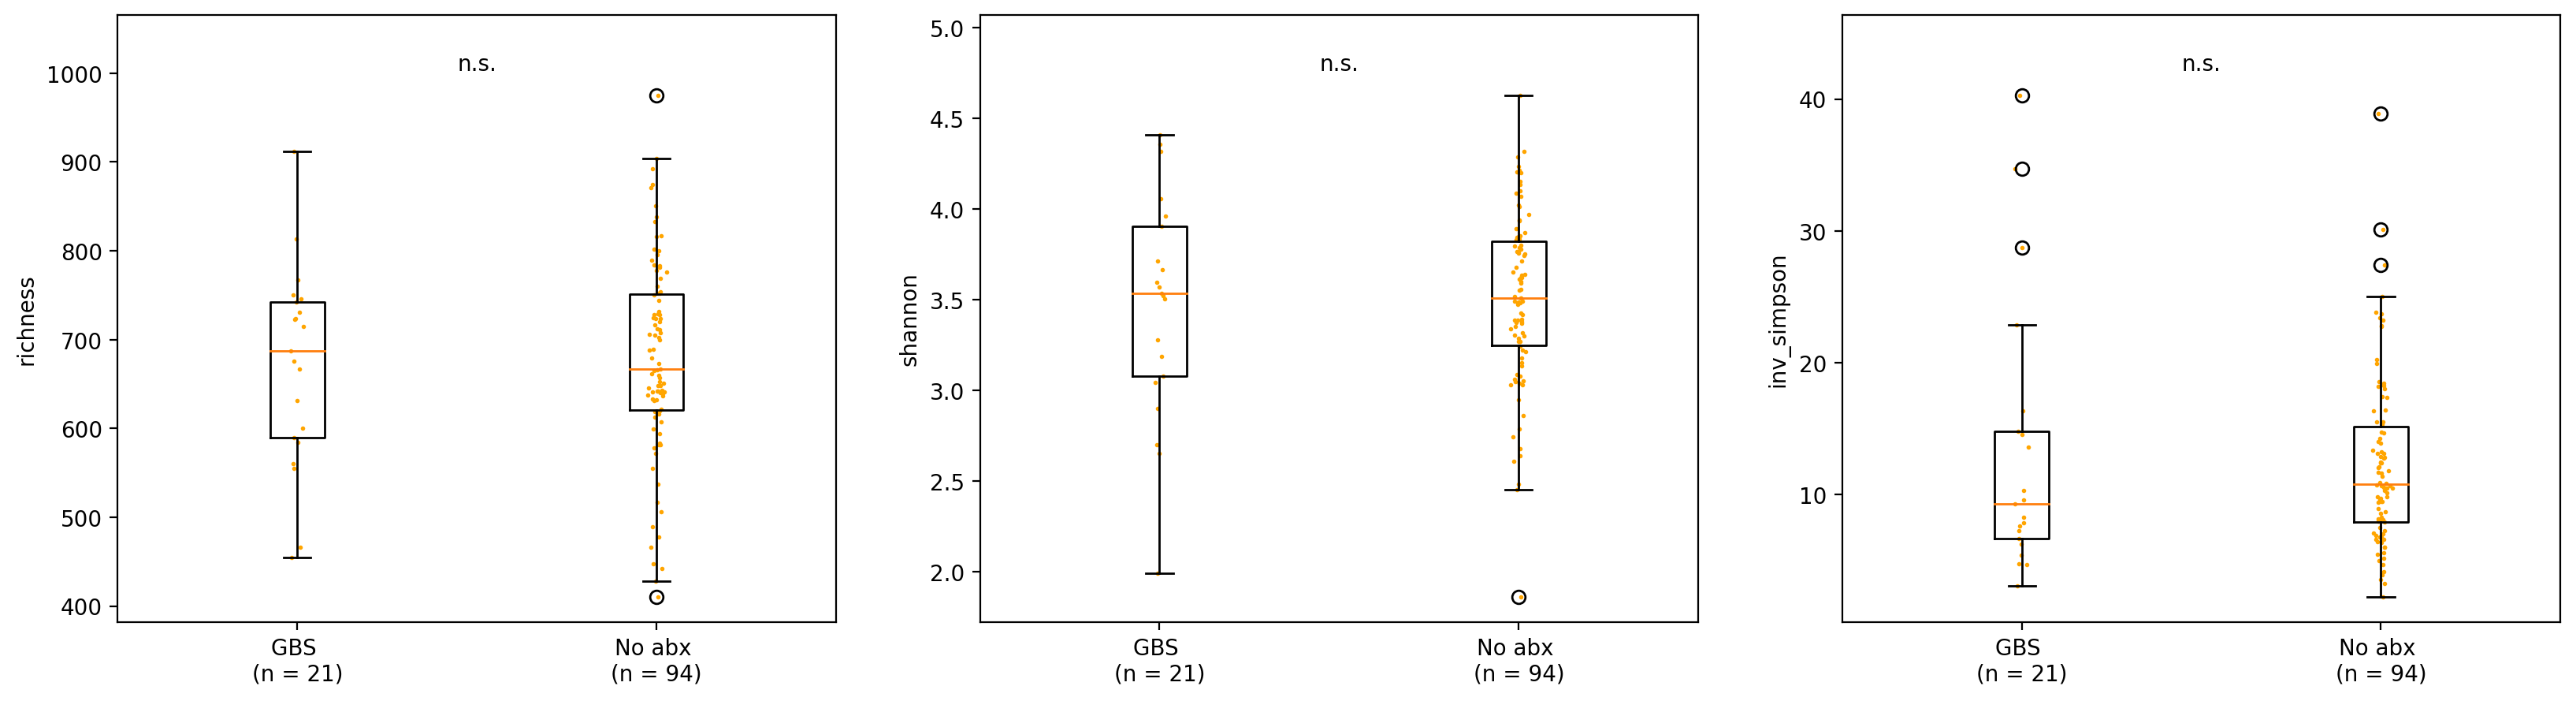

24
richness 0.47453300543594235
shannon 0.5061328969080643
inv_simpson 0.631706922363865


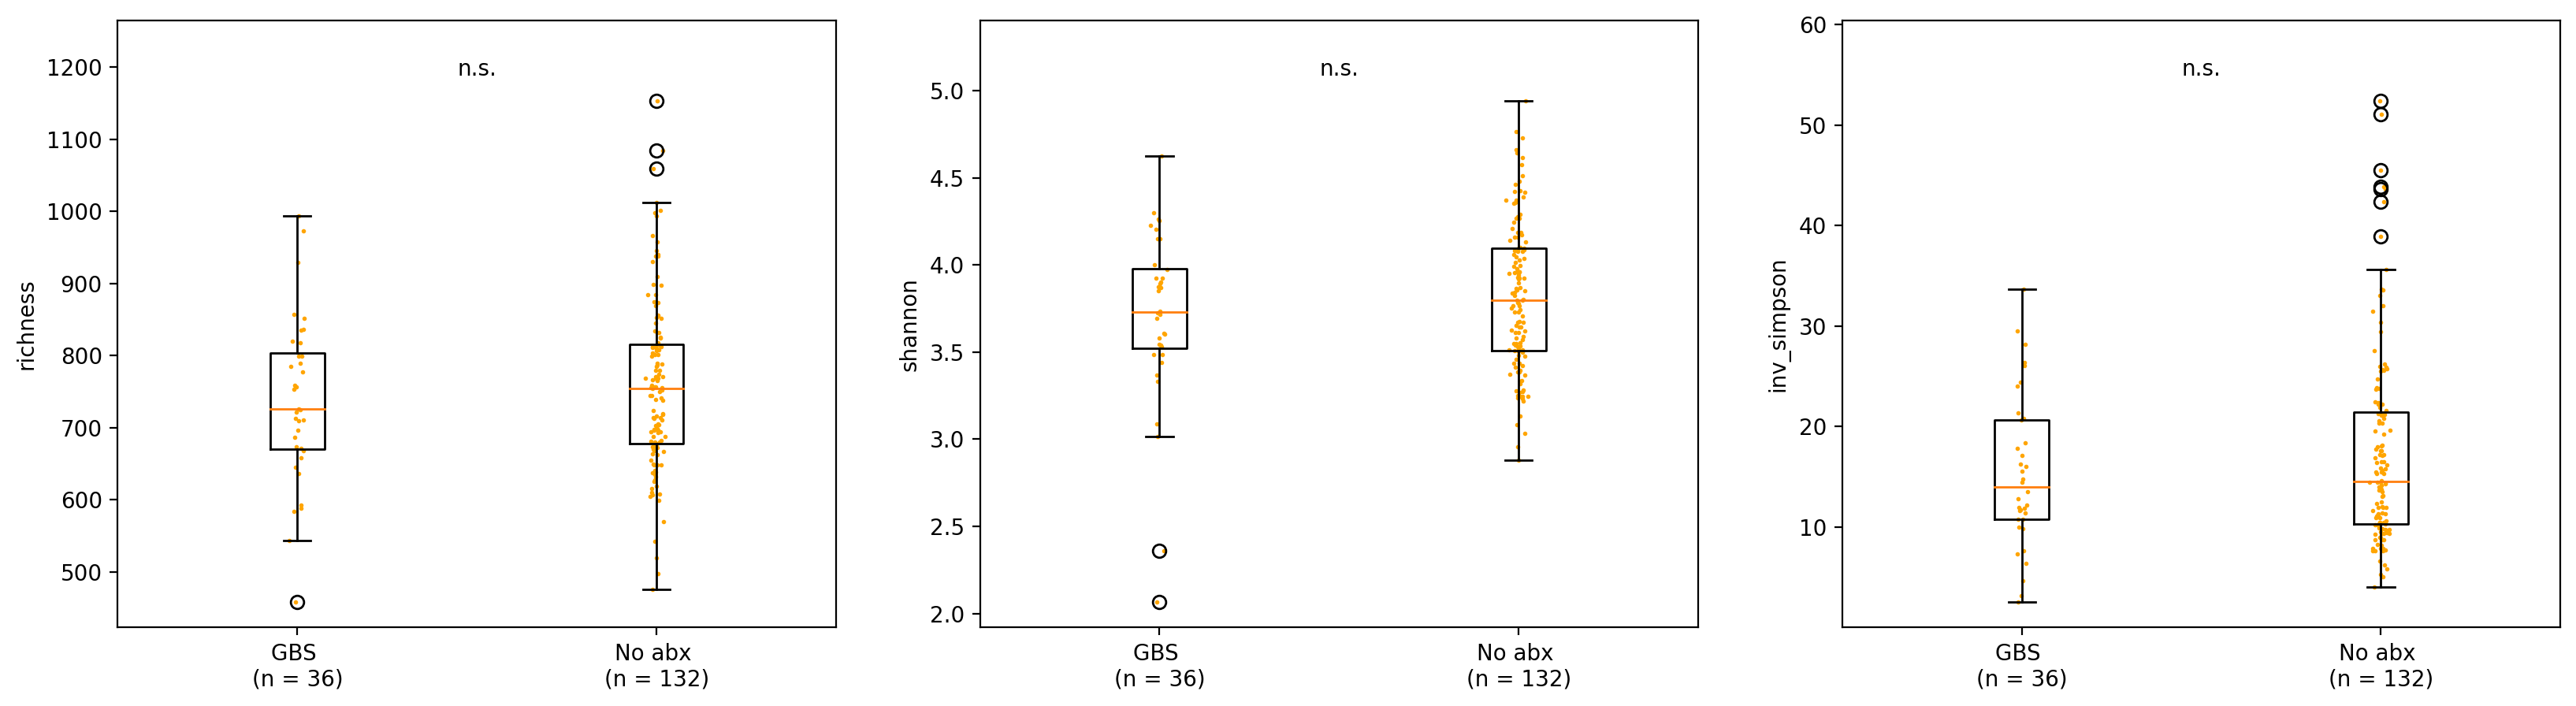

In [14]:
for i in [0, 1, 6, 12, 18, 24]:
    print(i)
    analyze_timepoint(i)